<a href="https://colab.research.google.com/github/brianp0513/NLP-project/blob/main/NLP_Project_k_mean_version2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [14]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.cluster import KMeans
from keras.preprocessing.text import Tokenizer
from keras.preprocessing import sequence
%matplotlib inline
import time
import re
from wordcloud import WordCloud
import random
import os
from sklearn import metrics 
from scipy.spatial.distance import cdist 


In [3]:
def getTextFromFiles(df, data_path, depression, limit):
    """Return Data Frame """

    for file in os.listdir(data_path)[:limit]:
        with open(data_path + "/" + file, 'r', encoding="ISO-8859-1") as file1:
            file1 = file1.read()
            df = df.append({'text': file1, 'depression': int(depression)}, ignore_index=True)

    return df


In [22]:
data_path_d = "/content/drive/My Drive/NLP Team/code/kerasData/reddit_depression"
data_path_nd = "/content/drive/My Drive/NLP Team/code/kerasData/reddit_non_depression"
df = pd.DataFrame(columns=['text', 'depression'])
df = getTextFromFiles(df, data_path_d, 1, 500)
df = getTextFromFiles(df, data_path_nd, 0, 500)

In [23]:
X = df['text'].to_numpy()
Y = df['depression'].to_numpy()
# X_train,X_test,Y_train,Y_test = train_test_split(X,Y,test_size=0.15)

max_words = 1000
max_len = 150

tok = Tokenizer(num_words=max_words)
tok.fit_on_texts(X)
sequences = tok.texts_to_sequences(X)
sequences_matrix = sequence.pad_sequences(sequences,maxlen=max_len)

In [24]:
init_centroid = 'k-means++'
y_kmList = []
distortions = [] 
inertias = [] 
mapping1 = {} 
mapping2 = {} 
K = range(1,10) 
X =  sequences_matrix
for k in K: 
    #Building and fitting the model 
    kmeanModel = KMeans(n_clusters=k, init = init_centroid, random_state=0)
    y_km = kmeanModel.fit(X)     
      
    distortions.append(sum(np.min(cdist(X, kmeanModel.cluster_centers_, 
                      'euclidean'),axis=1)) / X.shape[0]) 
    inertias.append(kmeanModel.inertia_) 

    y_kmList.append(y_km)

    mapping1[k] = sum(np.min(cdist(X, kmeanModel.cluster_centers_, 
                 'euclidean'),axis=1)) / X.shape[0] 
    mapping2[k] = kmeanModel.inertia_ 



# print(np.shape(y_km))
# plt.scatter(X[y_km==0, 0], X[y_km==0,1],c='lightgreen',marker='s',s=510,label='cluster1')
# plt.scatter(X[y_km==1, 0], X[y_km==1,1],c='orange',marker='o',s=50,label='cluster2')
# plt.scatter(km.cluster_centers_[:,0],km.cluster_centers_[:,1],c='red',marker='*',s=50,label='center')

# plt.legend()
# plt.grid(True)
# plt.show()


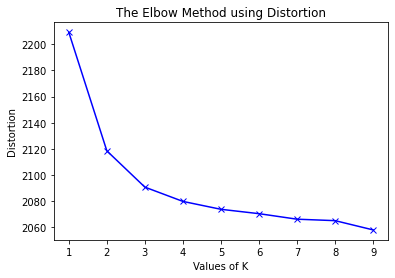

In [25]:
plt.plot(K, distortions, 'bx-') 
plt.xlabel('Values of K') 
plt.ylabel('Distortion') 
plt.title('The Elbow Method using Distortion') 
plt.show() 

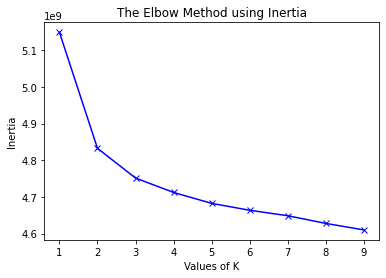

In [26]:
plt.plot(K, inertias, 'bx-')
plt.xlabel('Values of K')
plt.ylabel('Inertia')
plt.title('The Elbow Method using Inertia') 
plt.show() 

In [ ]:
print(sequences_matrix)
print(len(y_km))

In [ ]:
o_list= []
l_list=[]

for idx,iteration in enumerate(y_km):
  if(iteration ==1):
    l_list.append(idx)
  else:
    o_list.append(idx)
print(o_list)
print(l_list)

In [ ]:
print(X.shape)
cluster_o = []
cluster_l = []
for index in o_list:
  sentence = X[index]
  cluster_o.append(sentence)
print(cluster_o)
for index in l_list:
  sentence = X[index]
  cluster_l.append(sentence)
print(cluster_l)

In [ ]:
def makeWorldCloud(llist):
  depression_words = ''.join(llist)
  depression_wordclod = WordCloud(width = 512,height = 512).generate(depression_words)
  plt.figure(figsize = (10, 8), facecolor = 'k')
  plt.imshow(depression_wordclod)
  plt.axis('off')
  plt.tight_layout(pad = 0)
  plt.show()
makeWorldCloud(cluster_o)
makeWorldCloud(cluster_l)